# NBA Original Method

Fourteen ping-pong balls numbered 1 through 14 will be placed in a lottery machine. There are 1,001 possible combinations when four balls are drawn out of 14, without regard to their order of selection. Before the lottery, 1,000 of those 1,001 combinations will be assigned to the 14 participating lottery teams. The lottery machine is manufactured by the Smart Play Company, a leading manufacturer of state lottery machines throughout the United States. Smart Play also weighs, measures and certifies the ping-pong balls before the drawing.

The drawing process occurs in the following manner: All 14 balls are placed in the lottery machine and they are mixed for 20 seconds, and then the first ball is removed. The remaining balls are mixed in the lottery machine for another 10 seconds, and then the second ball is drawn. There is a 10-second mix, and then the third ball is drawn. There is a 10-second mix, and then the fourth ball is drawn. The team that has been assigned that combination will receive the No. 1 pick. The same process is repeated with the same ping-pong balls and lottery machine for the second through fourth picks.

If the same team comes up more than once, the result is discarded and another four-ball combination is selected. Also, if the one unassigned combination is drawn, the result is discarded and the balls are drawn again.

# Adapted Method

8 ping-pong balls are placed in the "machine". There are 70 total combinations when 4 balls are drawn without regard to order of selection. 

69 of the 70 are assigned to the 8 teams.

Then 8 balls are placed in the "machine". 4 balls are selected. The team that owns that combination will earn the 1st pick. Same is done for picks 2,3,4. If the same team comes up more than once, the result is discarded and another four-ball combination is selected. Also, if the one unassigned combination is drawn, the result is discarded and the balls are drawn again.

Teams can jump into the top 4 but after the top 4 picks are assigned the remaining picks (5-8) are assigned in reverse order of record (i.e. if Seed 1 dropped out of the top 4, it will get Pick 5)

In [266]:
import itertools
import pandas as pd
import random
import matplotlib.pyplot as plt
num_teams_lotto = 8
top_n_pick_jump = 4
seeds = list(range(1,num_teams_lotto+1))

number_of_combos = sum([1 for x in itertools.combinations(seeds, top_n_pick_jump)])

In [267]:
#combination proportions
#percent of combos each seed is assigned

seed_props = {}
# seed_props[1] = .24
# seed_props[2] = .19
# seed_props[3] = .15
# seed_props[4] = .12
# seed_props[5] = .1
# seed_props[6] = .08
# seed_props[7] = .06
# seed_props[8] = .04

seed_props[1] = .38
seed_props[2] = .23
seed_props[3] = .14
seed_props[4] = .08
seed_props[5] = .06
seed_props[6] = .04
seed_props[7] = .03
seed_props[8] = .02




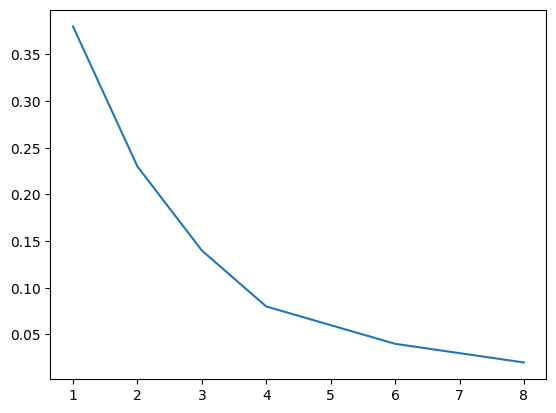

In [268]:
plt.plot([1,2,3,4,5,6,7,8], [.38,.23,.14,.08,.06,.04,.03,.02]) 

In [235]:
#combination numbers
#number of combos each seed is assigned

seed_nums = {}
for seed in seeds:
    seed_nums[seed] = round(seed_props[seed] * number_of_combos)


In [236]:
#get combinations
combinations = []
for k in itertools.combinations(seeds, top_n_pick_jump):
    combinations.append(k)
    #print(k)
    
combinations_df = pd.DataFrame(combinations)

In [237]:
#shuffle indices
random_index = list(combinations_df.index.values)
random.shuffle(random_index)

In [238]:
#get combos assigned to each seed
cumulative_len = 0
seed_combos = {}

for seed in seeds:
    seed_combos[seed] = combinations_df.iloc[random_index[cumulative_len : cumulative_len + seed_nums[seed]]]
    cumulative_len += seed_nums[seed]

In [263]:
seeds_assigned = []
picks_to_assign = list(range(1,top_n_pick_jump+1))

while len(picks_to_assign)>0:
    pick = picks_to_assign[0]
    pick_combo = random.sample(seeds, top_n_pick_jump)
    pick_combo.sort()
    
    for seed in seeds:

        seed_n_combos = seed_combos[seed]

        if len(seed_n_combos[(seed_n_combos[0]==pick_combo[0]) &
                      (seed_n_combos[1]==pick_combo[1]) &
                      (seed_n_combos[2]==pick_combo[2]) &
                      (seed_n_combos[3]==pick_combo[3])])>0:
            
            if seed in seeds_assigned:
                print(f'Seed: {seed} won pick {pick} but is already assigned to another pick')
                pass
                
            else:
                print(f'Pick {pick} goes to Seed: {seed}')
                print(pick_combo)
                seeds_assigned.append(seed)
                picks_to_assign.remove(pick)


seeds_assigned + list(set(seeds_assigned) ^ set(seeds))

Pick 1 goes to Seed: 2
[1, 2, 3, 6]
Pick 2 goes to Seed: 1
[2, 4, 5, 8]
Seed: 1 won pick 3 but is already assigned to another pick
Pick 3 goes to Seed: 5
[1, 3, 7, 8]
Seed: 2 won pick 4 but is already assigned to another pick
Pick 4 goes to Seed: 6
[1, 6, 7, 8]


[2, 1, 5, 6, 3, 4, 7, 8]

[3, 1, 4, 2, 5, 6, 7, 8]